https://realpython.com/regex-python/

https://realpython.com/regex-python-part-2/#re-module-functions

Table of Contents:
* Regexes in Python and Their Uses
  * A (Very Brief) History of Regular Expressions
  * The re Module
  * First Pattern-Matching Example
  * Python Regex Metacharacters
* Metacharacters Supported by the re Module
  * Metacharacters That Match a Single Character
  * Escaping Metacharacters
  * Anchors
  * Quantifiers
  * Grouping Constructs and Backreferences
  * Lookahead and Lookbehind Assertions
  * Miscellaneous Metacharacters
* Modified Regular Expression Matching With Flags
  * Supported Regular Expression Flags
  * Combining <flags> Arguments in a Function Call
  * Setting and Clearing Flags Within a Regular Expression
  
Part Two:
* re Module Functions
  * Searching Functions
  * Substitution Functions
  * Utility Functions
* Compiled Regex Objects in Python
  * Why Bother Compiling a Regex?
  * Regular Expression Object Methods
  * Regular Expression Object Attributes
* Match Object Methods and Attributes
  * Match Object Methods
  * Match Object Attributes

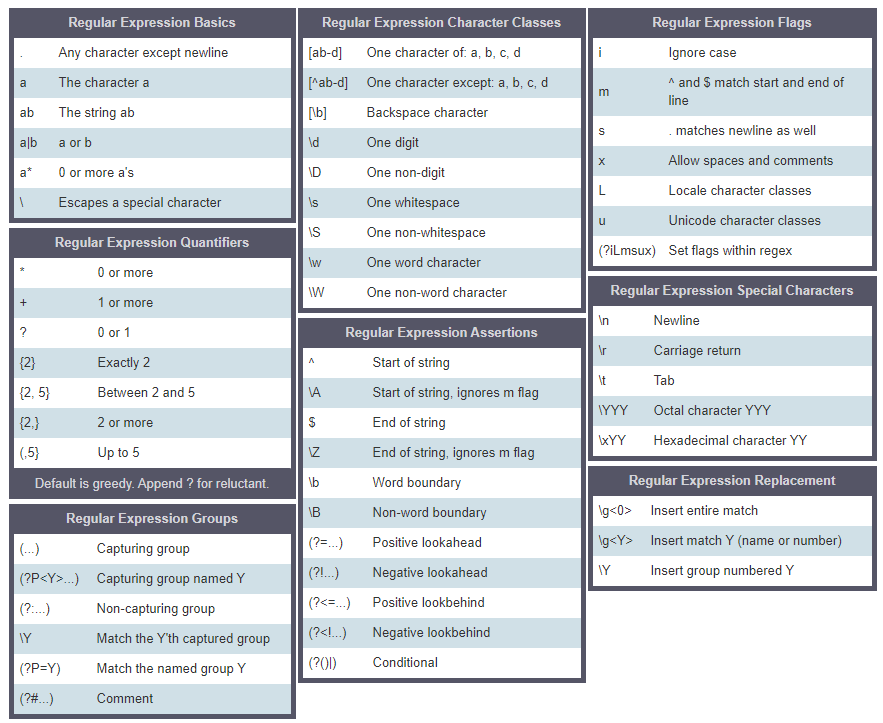

# Regexes in Python and Their Uses

**A (Very Brief) History of Regular Expressions**

In 1951, mathematician Stephen Cole Kleene described the concept of a regular language, a language that is recognizable by a finite automaton and formally expressible using regular expressions. In the mid-1960s, computer science pioneer Ken Thompson, one of the original designers of Unix, implemented pattern matching in the QED text editor using Kleene’s notation.

Since then, regexes have appeared in many programming languages, editors, and other tools as a means of determining whether a string matches a specified pattern. Python, Java, and Perl all support regex functionality, as do most Unix tools and many text editors.

**The re Module**

Regex functionality in Python resides in a module named re. The re module contains many useful functions and methods, most of which you’ll learn about in the next tutorial in this series.

For now, you’ll focus predominantly on one function, re.search().

`re.search(<regex>, <string>)` - Scans a string for a regex match.

`re.search(<regex>, <string>)` scans `<string>` looking for the first location where the pattern `<regex>` matches. If a match is found, then re.search() returns a match object. Otherwise, it returns None.

re.search() takes an optional third `<flags>` argument that you’ll learn about at the end of this tutorial.

In [ ]:
s = 'foo123bar'

# One last reminder to import!
import re

mo = re.search('123', s)
mo

<_sre.SRE_Match object; span=(3, 6), match='123'>

Here, the search pattern `<regex>` is 123 and `<string>` is s. The returned match object appears on line 7. Match objects contain a wealth of useful information that you’ll explore soon.

For the moment, the important point is that re.search() did in fact return a match object rather than None. That tells you that it found a match. In other words, the specified <regex> pattern 123 is present in s.

A match object is truthy, so you can use it in a Boolean context like a conditional statement:

In [ ]:
if re.search('123', s):
    print('Found a match.')
else:
    print('No match.')

Found a match.


> Match object:

In [ ]:
mo

<_sre.SRE_Match object; span=(3, 6), match='123'>

The interpreter displays the match object as `<_sre.SRE_Match object; span=(3, 6), match='123'>`. This contains some useful information.

span=(3, 6) indicates the portion of `<string>` in which the match was found. This means the same thing as it would in slice notation:

In [ ]:
s[3:6]

'123'

In this example, the match starts at character position 3 and extends up to but not including position 6.

match='123' indicates which characters from `<string>` matched. 




# Python Regex Metacharacters

The real power of regex matching in Python emerges when `<regex>` contains special characters called metacharacters. These have a unique meaning to the regex matching engine and vastly enhance the capability of the search.

Consider again the problem of how to determine whether a string contains any three consecutive decimal digit characters.

In a regex, a set of characters specified in square brackets ([]) makes up a character class. This metacharacter sequence matches any single character that is in the class, as demonstrated in the following example:

**Metacharacters Supported by the re Module**

The following table briefly summarizes all the metacharacters supported by the re module. Some characters serve more than one purpose:

Character(s) - Meaning
* `.`	- Matches any single character except newline
* `^`	-  Anchors a match at the start of a string
  *  Complements a character class
* `$` -	Anchors a match at the end of a string
* `*` -	Matches zero or more repetitions
* `+` -	Matches one or more repetitions
* `?`	- Matches zero or one repetition
  * Specifies the non-greedy versions of *, +, and ?
  * Introduces a lookahead or lookbehind assertion
  * Creates a named group
* `{}` -	Matches an explicitly specified number of repetitions
* `\`	- Escapes a metacharacter of its special meaning
  * Introduces a special character class
  * Introduces a grouping backreference
* `[]` -	Specifies a character class
* `|`	- Designates alternation
* `()`	- Creates a group
:
#
=
!	Designate a specialized group
<>	Creates a named group

## Metacharacters That Match a Single Character

The metacharacter sequences in this section try to match a single character from the search string. When the regex parser encounters one of these metacharacter sequences, a match happens if the character at the current parsing position fits the description that the sequence describes.

> **Character Class** - `[]`

Specifies a specific set of characters to match.

Characters contained in square brackets ([]) represent a **character class**, an enumerated set of characters to match from. A character class metacharacter sequence will match any single character contained in the class.

You can enumerate the characters individually like this:



In [ ]:
re.search('ba[artz]', 'foobarqux'), re.search('ba[artz]', 'foobazqux')

(<_sre.SRE_Match object; span=(3, 6), match='bar'>,
 <_sre.SRE_Match object; span=(3, 6), match='baz'>)

The metacharacter sequence [artz] matches any single 'a', 'r', 't', or 'z' character. In the example, the regex ba[artz] matches both 'bar' and 'baz' (and would also match 'baa' and 'bat').

A character class can also contain a range of characters separated by a hyphen (-), in which case it matches any single character within the range. For example, [a-z] matches any lowercase alphabetic character between 'a' and 'z', inclusive:

In [ ]:
re.search('[a-z]', 'FOObar')

<_sre.SRE_Match object; span=(3, 4), match='b'>

[0-9] matches any digit character:

In [ ]:
re.search('[0-9][0-9]', 'foo123bar')
# use multiple character class in string to represent 

<_sre.SRE_Match object; span=(3, 5), match='12'>

In this case, [0-9][0-9] matches a sequence of two digits. The first portion of the string 'foo123bar' that matches is '12'.

[0-9a-fA-F] matches any hexadecimal digit character:

In [ ]:
re.search('[0-9a-zA-z]', '--- t0 ---')

<_sre.SRE_Match object; span=(4, 5), match='t'>

Here, [0-9a-fA-F] matches the first hexadecimal digit character in the search string, 'a'.

*Note: In the above examples, the return value is always the leftmost possible match. re.search() scans the search string from left to right, and as soon as it locates a match for <regex>, it stops scanning and returns the match.*

> `^` - **Hat Character**

You can complement a character class by specifying ^ as the first character, in which case it matches any character that isn’t in the set. In the following example, [^0-9] matches any character that isn’t a digit:

In [ ]:
re.search('[^0-9]', '12345foo')

<_sre.SRE_Match object; span=(5, 6), match='f'>

Here, the match object indicates that the first character in the string that isn’t a digit is 'f'.

If a ^ character appears in a character class but isn’t the first character, then it has no special meaning and matches a literal '^' character:

In [ ]:
re.search('[#:^]', 'foo^bar:baz#qux')

<_sre.SRE_Match object; span=(3, 4), match='^'>

As you’ve seen, you can specify a range of characters in a character class by separating characters with a hyphen. What if you want the character class to include a literal hyphen character? You can place it as the first or last character or escape it with a backslash (\):

In [ ]:
re.search('[-abc]', '123-456'), re.search('[abc-]', '123-456'),re.search('[ab\-c]', '123-456')

(<_sre.SRE_Match object; span=(3, 4), match='-'>,
 <_sre.SRE_Match object; span=(3, 4), match='-'>,
 <_sre.SRE_Match object; span=(3, 4), match='-'>)

If you want to include a literal ']' in a character class, then you can place it as the first character or escape it with backslash:

In [ ]:
re.search('[]]', 'foo[1]'), re.search('[ab\]cd]', 'foo[1]')

(<_sre.SRE_Match object; span=(5, 6), match=']'>,
 <_sre.SRE_Match object; span=(5, 6), match=']'>)

Other regex metacharacters lose their special meaning inside a character class:

In [ ]:
re.search('[)*+|]', '123*456'),  re.search('[)*+|]', '123+456')

(<_sre.SRE_Match object; span=(3, 4), match='*'>,
 <_sre.SRE_Match object; span=(3, 4), match='+'>)

As you saw in the table above, * and + have special meanings in a regex in Python. They designate repetition, which you’ll learn more about shortly. But in this example, they’re inside a character class, so they match themselves literally.  

> Wildcard - `.` - **dot character**

In [ ]:
#The . metacharacter matches any single character except a newline:
print(re.search('foo.bar', 'fooxbar'))
print(re.search('foo.bar', 'foobar'))
print(re.search('foo.bar', 'foo\nbar'))

<_sre.SRE_Match object; span=(0, 7), match='fooxbar'>
None
None


As a regex, foo.bar essentially means the characters 'foo', then any character except newline, then the characters 'bar'. The first string shown above, 'fooxbar', fits the bill because the `.` metacharacter matches the 'x'.

The second and third strings fail to match. In the last case, although there’s a character between 'foo' and 'bar', it’s a newline, and by default, the `.` metacharacter doesn’t match a newline. There is, however, a way to force `.` to match a newline, which you’ll learn about at the end of this tutorial.

> `\w` or `\W` - Match based on whether a character is a word character.

\w matches any alphanumeric word character. Word characters are uppercase and lowercase letters, digits, and the underscore (_) character, so \w is essentially shorthand for [a-zA-Z0-9_]:



In [ ]:
re.search('\w', '#(.a$@&'), re.search('[a-zA-Z0-9_]', '#(.a$@&')

(<_sre.SRE_Match object; span=(3, 4), match='a'>,
 <_sre.SRE_Match object; span=(3, 4), match='a'>)

In this case, the first word character in the string '#(.a$@&' is 'a'.

\W is the opposite. It matches any non-word character and is equivalent to [^a-zA-Z0-9_]:


In [ ]:
re.search('\W', 'a_1*3Qb'), re.search('[^a-zA-Z0-9_]', 'a_1*3Qb')

(<_sre.SRE_Match object; span=(3, 4), match='*'>,
 <_sre.SRE_Match object; span=(3, 4), match='*'>)

> `\d` or `\D` - Match based on whether a character is a decimal digit.

\d matches any decimal digit character. \D is the opposite. It matches any character that isn’t a decimal digit:

In [ ]:
re.search('\d', 'abc4def'), re.search('\D', '234Q678')

(<_sre.SRE_Match object; span=(3, 4), match='4'>,
 <_sre.SRE_Match object; span=(3, 4), match='Q'>)

\d is essentially equivalent to [0-9], and \D is equivalent to [^0-9].

> `\s` or `\S` - Match based on whether a character represents whitespace.

\s matches any whitespace character:


In [ ]:
re.search('\s', 'foo\nbar baz')

<_sre.SRE_Match object; span=(3, 4), match='\n'>

Note that, unlike the dot wildcard metacharacter, \s does match a newline character.

\S is the opposite of \s. It matches any character that isn’t whitespace:

In [ ]:
re.search('\S', '  \n foo  \n  ')

<_sre.SRE_Match object; span=(4, 5), match='f'>

Again, \s and \S consider a newline to be whitespace. In the example above, the first non-whitespace character is 'f'.

The character class sequences \w, \W, \d, \D, \s, and \S can appear inside a square bracket character class as well:


In [ ]:
re.search('[\d\w\s]', '---3---'), re.search('[\d\w\s]', '---a---'), re.search('[\d\w\s]', '--- ---')

(<_sre.SRE_Match object; span=(3, 4), match='3'>,
 <_sre.SRE_Match object; span=(3, 4), match='a'>,
 <_sre.SRE_Match object; span=(3, 4), match=' '>)

In this case, [\d\w\s] matches any digit, word, or whitespace character. And since \w includes \d, the same character class could also be expressed slightly shorter as [\w\s].


## Escaping Metacharacters

Occasionally, you’ll want to include a metacharacter in your regex, except you won’t want it to carry its special meaning. Instead, you’ll want it to represent itself as a literal character.



> `\` - backslash 

Removes the special meaning of a metacharacter.

As you’ve just seen, the backslash character can introduce special character classes like word, digit, and whitespace. There are also special metacharacter sequences called anchors that begin with a backslash, which you’ll learn about below.

When it’s not serving either of these purposes, the backslash escapes metacharacters. A metacharacter preceded by a backslash loses its special meaning and matches the literal character instead. Consider the following examples:

In [ ]:
re.search('.', 'foo.bar'), re.search('\.', 'foo.bar')

(<_sre.SRE_Match object; span=(0, 1), match='f'>,
 <_sre.SRE_Match object; span=(3, 4), match='.'>)

In the `<regex>` on line 1, the dot (.) functions as a wildcard metacharacter, which matches the first character in the string ('f'). The . character in the <regex> on line 4 is escaped by a backslash, so it isn’t a wildcard. It’s interpreted literally and matches the '.' at index 3 of the search string.

Using backslashes for escaping can get messy. Suppose you have a string that contains a single backslash:

In the `<regex>` on line 1, the dot (.) functions as a wildcard metacharacter, which matches the first character in the string ('f'). The . character in the `<regex>` on line 4 is escaped by a backslash, so it isn’t a wildcard. It’s interpreted literally and matches the '.' at index 3 of the search string.

Using backslashes for escaping can get messy. Suppose you have a string that contains a single backslash:
```
s = r'foo\bar'
print(s)
```
Now suppose you want to create a `<regex>` that will match the backslash between 'foo' and 'bar'.

The way to handle this is to specify the <regex> using a raw string:


In [ ]:
import re
re.search(r'\\', r'foo\bar')

<_sre.SRE_Match object; span=(3, 4), match='\\'>

This suppresses the escaping at the interpreter level. The string '\\' gets passed unchanged to the regex parser, which again sees one escaped backslash as desired.

It’s good practice to use a raw string to specify a regex in Python whenever it contains backslashes.

## Anchors

Anchors are zero-width matches. They don’t match any actual characters in the search string, and they don’t consume any of the search string during parsing. Instead, an anchor dictates a particular location in the search string where a match must occur.



> `^` - `\A` Anchor a match to the start of `<string>`.

When the regex parser encounters ^ or \A, the parser’s current position must be at the beginning of the search string for it to find a match.

In other words, regex ^foo stipulates that 'foo' must be present not just any old place in the search string, but at the beginning:


In [ ]:
print(re.search('^foo', 'foobar'))

print(re.search('^foo', 'barfoo'))
#^string doesn't start with 'foo'

<_sre.SRE_Match object; span=(0, 3), match='foo'>
None


\A functions similarly:

In [ ]:
print(re.search('\Afoo', 'foobar'))

print(re.search('\Afoo', 'barfoo'))

<_sre.SRE_Match object; span=(0, 3), match='foo'>
None


^ and \A behave slightly differently from each other in MULTILINE mode. You’ll learn more about MULTILINE mode below in the section on flags.

`$` -`\Z` - Anchor a match to the end of <string>.

When the regex parser encounters `$` or `\Z`, the parser’s current position must be at the end of the search string for it to find a match. Whatever precedes `$` or `\Z` must constitute the end of the search string:

In [ ]:
print(re.search('bar$', 'foobar'))
print(re.search('bar$', 'barfoo'))
print(re.search('bar\Z', 'foobar'))
print(re.search('bar\Z', 'barfoo'))

<_sre.SRE_Match object; span=(3, 6), match='bar'>
None
<_sre.SRE_Match object; span=(3, 6), match='bar'>
None


As a special case, $ (but not \Z) also matches just before a single newline at the end of the search string:


In [ ]:
re.search('bar$', 'foobar\n')

<_sre.SRE_Match object; span=(3, 6), match='bar'>

In this example, 'bar' isn’t technically at the end of the search string because it’s followed by one additional newline character. But the regex parser lets it slide and calls it a match anyway. This exception doesn’t apply to \Z.

$ and \Z behave slightly differently from each other in MULTILINE mode. See the section below on flags for more information on MULTILINE mode.

> `\b` - Anchors a match to a word boundary.

\b asserts that the regex parser’s current position must be at the beginning or end of a word. A word consists of a sequence of alphanumeric characters or underscores ([a-zA-Z0-9_]), the same as for the \w character class:



In [ ]:
import re
print(re.search(r'\bbar', 'foo bar'))
print(re.search(r'\bbar', 'foo.bar'))
print(re.search(r'\bbar', 'foobar'))

print(re.search(r'foo\b', 'foo bar'))
print(re.search(r'foo\b', 'foo.bar'))
print(re.search(r'foo\b', 'foobar'))

<_sre.SRE_Match object; span=(4, 7), match='bar'>
<_sre.SRE_Match object; span=(4, 7), match='bar'>
None
<_sre.SRE_Match object; span=(0, 3), match='foo'>
<_sre.SRE_Match object; span=(0, 3), match='foo'>
None




In the above examples, a match happens on lines 1 and 3 because there’s a word boundary at the start of 'bar'. This isn’t the case on line 6, so the match fails there.

Similarly, there are matches on lines 9 and 11 because a word boundary exists at the end of 'foo', but not on line 14.

Using the \b anchor on both ends of the <regex> will cause it to match when it’s present in the search string as a whole word:



In [ ]:
print(re.search(r'\bbar\b', 'foo bar baz'))
print(re.search(r'\bbar\b', 'foo(bar)baz'))
print(re.search(r'\bbar\b', 'foobarbaz'))

<_sre.SRE_Match object; span=(4, 7), match='bar'>
<_sre.SRE_Match object; span=(4, 7), match='bar'>
None


This is another instance in which it pays to specify the `<regex>` as a raw string, as the above examples have done.

Because '\b' is an escape sequence for both string literals and regexes in Python, each use above would need to be double escaped as '\\b' if you didn’t use raw strings. That wouldn’t be the end of the world, but raw strings are tidier.

> `\B` - Anchors a match to a location that isn’t a word boundary.

\B does the opposite of \b. It asserts that the regex parser’s current position must not be at the start or end of a word:


In [ ]:
print(re.search(r'\Bfoo\B', 'foo'))
print(re.search(r'\Bfoo\B', '.foo.'))
re.search(r'\Bfoo\B', 'barfoobaz')

None
None


<_sre.SRE_Match object; span=(3, 6), match='foo'>


In this case, a match happens on line 7 because no word boundary exists at the start or end of 'foo' in the search string 'barfoobaz'.




## Quantifiers  (and greedy vs lazy)

A quantifier metacharacter immediately follows a portion of a `<regex>` and indicates how many times that portion must occur for the match to succeed.

> `*` - star - Matches zero or more repetitions of the preceding regex.

For example, a* matches zero or more 'a' characters. That means it would match an empty string, 'a', 'aa', 'aaa', and so on.

Consider these examples:



In [ ]:
print(re.search('foo-*bar', 'foobar'))                     # Zero dashes
print(re.search('foo-*bar', 'foo-bar'))                    # One dash
re.search('foo-*bar', 'foo--bar')                          # Two dashes

<_sre.SRE_Match object; span=(0, 6), match='foobar'>
<_sre.SRE_Match object; span=(0, 7), match='foo-bar'>


<_sre.SRE_Match object; span=(0, 8), match='foo--bar'>



On line 1, there are zero '-' characters between 'foo' and 'bar'. On line 3 there’s one, and on line 5 there are two. The metacharacter sequence -* matches in all three cases.



You’ll probably encounter the regex .* in a Python program at some point. This matches zero or more occurrences of any character. In other words, it essentially matches any character sequence up to a line break. (Remember that the . wildcard metacharacter doesn’t match a newline.)

In this example, .* matches everything between 'foo' and 'bar':



In [ ]:
re.search('foo.*bar', '# foo $qux@grault % bar #')

<_sre.SRE_Match object; span=(2, 23), match='foo $qux@grault % bar'>



Did you notice the span= and match= information contained in the match object?

Until now, the regexes in the examples you’ve seen have specified matches of predictable length. Once you start using quantifiers like *, the number of characters matched can be quite variable, and the information in the match object becomes more useful.

You’ll learn more about how to access the information stored in a match object in the next tutorial in the series.

> `+` - plus - Matches one or more repetitions of the preceding regex.

This is similar to *, but the quantified regex must occur at least once:



In [ ]:
print(re.search('foo-+bar', 'foobar'))              # Zero dashes
print(re.search('foo-+bar', 'foo-bar'))             # One dash
re.search('foo-+bar', 'foo--bar')                   # Two dashes

None
<_sre.SRE_Match object; span=(0, 7), match='foo-bar'>


<_sre.SRE_Match object; span=(0, 8), match='foo--bar'>


Remember from above that foo-*bar matched the string 'foobar' because the * metacharacter allows for zero occurrences of '-'. The + metacharacter, on the other hand, requires at least one occurrence of '-'. That means there isn’t a match on line 1 in this case.

> `?` - question mark - Matches zero or one repetitions of the preceding regex.

Again, this is similar to * and +, but in this case there’s only a match if the preceding regex occurs once or not at all:


In [ ]:
print(re.search('foo-?bar', 'foobar'))                     # Zero dashes
print(re.search('foo-?bar', 'foo-bar'))                    # One dash
print(re.search('foo-?bar', 'foo--bar'))                   # Two dashes

<_sre.SRE_Match object; span=(0, 6), match='foobar'>
<_sre.SRE_Match object; span=(0, 7), match='foo-bar'>
None




In this example, there are matches on lines 1 and 3. But on line 5, where there are two '-' characters, the match fails.



Here are some more examples showing the use of all three quantifier metacharacters:



In [ ]:
print(re.match('foo[1-9]*bar', 'foobar'))
print(re.match('foo[1-9]*bar', 'foo42bar'), '\n')

print(re.match('foo[1-9]+bar', 'foobar'))
print(re.match('foo[1-9]+bar', 'foo42bar'), '\n')

print(re.match('foo[1-9]?bar', 'foobar'))
print(re.match('foo[1-9]?bar', 'foo42bar'))


<_sre.SRE_Match object; span=(0, 6), match='foobar'>
<_sre.SRE_Match object; span=(0, 8), match='foo42bar'> 

None
<_sre.SRE_Match object; span=(0, 8), match='foo42bar'> 

<_sre.SRE_Match object; span=(0, 6), match='foobar'>
None



This time, the quantified regex is the character class [1-9] instead of the simple character '-'.

> `*?`,`+?`,`??` - The non-greedy (or lazy) versions of the *, +, and ? quantifiers.

When used alone, the quantifier metacharacters *, +, and ? are all greedy, meaning they produce the longest possible match. Consider this example:



In [ ]:
re.search('<.*>', '%<foo> <bar> <baz>%')

<_sre.SRE_Match object; span=(1, 18), match='<foo> <bar> <baz>'>



The regex `<.*>` effectively means:

* A '<' character
* Then any sequence of characters
* Then a '>' character

But which '>' character? There are three possibilities:

1. The one just after 'foo'
2. The one just after 'bar'
3. The one just after 'baz'

Since the * metacharacter is greedy, it dictates the longest possible match, which includes everything up to and including the '>' character that follows 'baz'. You can see from the match object that this is the match produced.

If you want the shortest possible match instead, then use the non-greedy metacharacter sequence *?:

In [ ]:
re.search('<.*?>', '%<foo> <bar> <baz>%')

<_sre.SRE_Match object; span=(1, 6), match='<foo>'>



In this case, the match ends with the '>' character following 'foo'.

There are lazy versions of the + and ? quantifiers as well:



In [ ]:
print(re.search('<.+>', '%<foo> <bar> <baz>%'))
print(re.search('<.+?>', '%<foo> <bar> <baz>%'))

print(re.search('ba?', 'baaaa'))
re.search('ba??', 'baaaa')

<_sre.SRE_Match object; span=(1, 18), match='<foo> <bar> <baz>'>
<_sre.SRE_Match object; span=(1, 6), match='<foo>'>
<_sre.SRE_Match object; span=(0, 2), match='ba'>


<_sre.SRE_Match object; span=(0, 1), match='b'>



The first two examples on lines 1 and 3 are similar to the examples shown above, only using + and +? instead of * and *?.

The last examples on lines 6 and 8 are a little different. In general, the ? metacharacter matches zero or one occurrences of the preceding regex. The greedy version, ?, matches one occurrence, so ba? matches 'b' followed by a single 'a'. The non-greedy version, ??, matches zero occurrences, so ba?? matches just 'b'.

> `{m}` - Matches exactly m repetitions of the preceding regex.

This is similar to * or +, but it specifies exactly how many times the preceding regex must occur for a match to succeed:



In [ ]:
print(re.search('x-{3}x', 'x--x'))                # Two dashes
print(re.search('x-{3}x', 'x---x'))               # Three dashes
print(re.search('x-{3}x', 'x----x'))              # Four dashes

None
<_sre.SRE_Match object; span=(0, 5), match='x---x'>
None




Here, x-{3}x matches 'x', followed by exactly three instances of the '-' character, followed by another 'x'. The match fails when there are fewer or more than three dashes between the 'x' characters.



> `{m,n}` -Matches any number of repetitions of the preceding regex from m to n, inclusive.

In the following example, the quantified <regex> is -{2,4}. The match succeeds when there are two, three, or four dashes between the 'x' characters but fails otherwise:

In [ ]:
for i in range(1, 6):
    s = f"x{'-' * i}x"
    print(f'{i}  {s:10}', re.search('x-{2,4}x', s))

1  x-x        None
2  x--x       <_sre.SRE_Match object; span=(0, 4), match='x--x'>
3  x---x      <_sre.SRE_Match object; span=(0, 5), match='x---x'>
4  x----x     <_sre.SRE_Match object; span=(0, 6), match='x----x'>
5  x-----x    None


Omitting m implies a lower bound of 0, and omitting n implies an unlimited upper bound:

* `<regex>{,n}`	Any number of repetitions of `<regex>` less than or equal to n - same as `<regex>{0,n}`
* `<regex>{m,}`	Any number of repetitions of `<regex>` greater than or equal to m	
* `<regex>{,}`	Any number of repetitions of `<regex>`	- same as `<regex>{0,}`, `<regex>*`

If you omit all of m, n, and the comma, then the curly braces no longer function as metacharacters. {} matches just the literal string '{}'

In fact, to have any special meaning, a sequence with curly braces must fit one of the following patterns in which m and n are nonnegative integers:

* `{m,n}`
* `{m,}`
* `{,n}`
* `{,}`

Otherwise, it matches literally

`{m,n}?` - The non-greedy (lazy) version of {m,n}.

{m,n} will match as many characters as possible, and {m,n}? will match as few as possible:



In [ ]:
print(re.search('a{3,5}', 'aaaaaaaa'))
re.search('a{3,5}?', 'aaaaaaaa')

<_sre.SRE_Match object; span=(0, 5), match='aaaaa'>


<_sre.SRE_Match object; span=(0, 3), match='aaa'>



In this case, a{3,5} produces the longest possible match, so it matches five 'a' characters. a{3,5}? produces the shortest match, so it matches three.



## Grouping Constructs and Backreferences
Grouping constructs break up a regex in Python into subexpressions or groups. This serves two purposes:

* Grouping: A group represents a single syntactic entity. Additional metacharacters apply to the entire group as a unit.
* Capturing: Some grouping constructs also capture the portion of the search string that matches the subexpression in the group. You can retrieve captured matches later through several different mechanisms.

Here’s a look at how grouping and capturing work.

> `(<regex>)`- Defines a subexpression or group.

This is the most basic grouping construct. A regex in parentheses just matches the contents of the parentheses:



In [ ]:
print(re.search('(bar)', 'foo bar baz'))
re.search('bar', 'foo bar baz')

<_sre.SRE_Match object; span=(4, 7), match='bar'>


<_sre.SRE_Match object; span=(4, 7), match='bar'>


As a regex, (bar) matches the string 'bar', the same as the regex bar would without the parentheses.

**Treating a Group as a Unit**

A quantifier metacharacter that follows a group operates on the entire subexpression specified in the group as a single unit.

For instance, the following example matches one or more occurrences of the string 'bar':



In [ ]:
print(re.search('(bar)+', 'foo bar baz'))
print(re.search('(bar)+', 'foo barbar baz'))
re.search('(bar)+', 'foo barbarbarbar baz')

<_sre.SRE_Match object; span=(4, 7), match='bar'>
<_sre.SRE_Match object; span=(4, 10), match='barbar'>


<_sre.SRE_Match object; span=(4, 16), match='barbarbarbar'>

Here’s a breakdown of the difference between the two regexes with and without grouping parentheses:


* `bar+`	
  * The + metacharacter applies only to the character 'r'.
  * Matches:	'ba' followed by one or more occurrences of 'r'	
  * 'bar', 'barr', 'barrr'
* `(bar)+`
  * The + metacharacter applies to the entire string 'bar'.	
  * Matches: One or more occurrences of 'bar'	
  * 'bar', 'barbar', 'barbarbar'

Now take a look at a more complicated example. The regex (ba[rz]){2,4}(qux)? matches 2 to 4 occurrences of either 'bar' or 'baz', optionally followed by 'qux':



In [ ]:
print(re.search('(ba[rz]){2,4}(qux)?', 'bazbarbazqux'))
re.search('(ba[rz]){2,4}(qux)?', 'barbar')

<_sre.SRE_Match object; span=(0, 12), match='bazbarbazqux'>


<_sre.SRE_Match object; span=(0, 6), match='barbar'>



The following example shows that you can nest grouping parentheses:



In [ ]:
print(re.search('(foo(bar)?)+(\d\d\d)?', 'foofoobar'))
print(re.search('(foo(bar)?)+(\d\d\d)?', 'foofoobar123'))
print(re.search('(foo(bar)?)+(\d\d\d)?', 'foofoo123'))

<_sre.SRE_Match object; span=(0, 9), match='foofoobar'>
<_sre.SRE_Match object; span=(0, 12), match='foofoobar123'>
<_sre.SRE_Match object; span=(0, 9), match='foofoo123'>




The regex (foo(bar)?)+(\d\d\d)? is pretty elaborate, so let’s break it down into smaller pieces:


* `foo(bar)?` -	'foo' optionally followed by 'bar'
* `(foo(bar)?)+` -	One or more occurrences of the above
* `\d\d\d` -	Three decimal digit characters
* `(\d\d\d)?` -	Zero or one occurrences of the above

String it all together and you get: at least one occurrence of 'foo' optionally followed by 'bar', all optionally followed by three decimal digit characters.

As you can see, you can construct very complicated regexes in Python using grouping parentheses.

**Capturing Groups** 

Grouping isn’t the only useful purpose that grouping constructs serve. Most (but not quite all) grouping constructs also capture the part of the search string that matches the group. You can retrieve the captured portion or refer to it later in several different ways.

Remember the match object that re.search() returns? There are two methods defined for a match object that provide access to captured groups: .groups() and .group().

> `m.groups()` - Returns a tuple containing all the captured groups from a regex match.

Consider this example:



In [ ]:
m = re.search('(\w+),(\w+),(\w+)', 'foo,quux,baz')
m

<_sre.SRE_Match object; span=(0, 12), match='foo,quux,baz'>



Each of the three (\w+) expressions matches a sequence of word characters. The full regex (\w+),(\w+),(\w+) breaks the search string into three comma-separated tokens.

Because the (\w+) expressions use grouping parentheses, the corresponding matching tokens are captured. To access the captured matches, you can use .groups(), which returns a tuple containing all the captured matches in order:





In [ ]:
m.groups()

('foo', 'quux', 'baz')



Notice that the tuple contains the tokens but not the commas that appeared in the search string. That’s because the word characters that make up the tokens are inside the grouping parentheses but the commas aren’t. The commas that you see between the returned tokens are the standard delimiters used to separate values in a tuple.

**Backreferences**

You can match a previously captured group later within the same regex using a special metacharacter sequence called a backreference.

> `\<n>` - Matches the contents of a previously captured group.

Within a regex in Python, the sequence `\<n>`, where `<n>` is an integer from 1 to 99, matches the contents of the `<n>`th captured group.

Here’s a regex that matches a word, followed by a comma, followed by the same word again:



In [ ]:
regex = r'(\w+),\1'

m = re.search(regex, 'foo,foo')
print(m)
print(m.group(1), '\n')

m = re.search(regex, 'qux,qux')
print(m)
print(m.group(1), '\n')


m = re.search(regex, 'foo,qux')
print(m)

<_sre.SRE_Match object; span=(0, 7), match='foo,foo'>
foo 

<_sre.SRE_Match object; span=(0, 7), match='qux,qux'>
qux 

None


In the first example, on line 3, (\w+) matches the first instance of the string 'foo' and saves it as the first captured group. The comma matches literally. Then \1 is a backreference to the first captured group and matches 'foo' again. The second example, on line 9, is identical except that the (\w+) matches 'qux' instead.

The last example, on line 15, doesn’t have a match because what comes before the comma isn’t the same as what comes after it, so the \1 backreference doesn’t match.

Note: Any time you use a regex in Python with a numbered backreference, it’s a good idea to specify it as a raw string. Otherwise, the interpreter may confuse the backreference with an octal value.


**Other Grouping Constructs**

The `(<regex>)` metacharacter sequence shown above is the most straightforward way to perform grouping within a regex in Python. The next section introduces you to some enhanced grouping constructs that allow you to tweak when and how grouping occurs.

> `(?P<name><regex>)` - Creates a named captured group.

This metacharacter sequence is similar to grouping parentheses in that it creates a group matching `<regex>` that is accessible through the match object or a subsequent backreference. The difference in this case is that you reference the matched group by its given symbolic `<name>` instead of by its number.

Earlier, you saw this example with three captured groups numbered 1, 2, and 3:



In [ ]:
m = re.search('(\w+),(\w+),(\w+)', 'foo,quux,baz')
print(m.groups())
m.group(1, 2, 3)

('foo', 'quux', 'baz')


('foo', 'quux', 'baz')



The following effectively does the same thing except that the groups have the symbolic names w1, w2, and w3:



In [ ]:
m = re.search('(?P<w1>\w+),(?P<w2>\w+),(?P<w3>\w+)', 'foo,quux,baz')
m.groups()

('foo', 'quux', 'baz')



You can refer to these captured groups by their symbolic names:



In [ ]:
print(m.group('w1'))
print(m.group('w3'))
m.group('w1', 'w2', 'w3')

foo
baz


('foo', 'quux', 'baz')

You can still access groups with symbolic names by number if you wish:



In [ ]:
m = re.search('(?P<w1>\w+),(?P<w2>\w+),(?P<w3>\w+)', 'foo,quux,baz')

print(m.group('w1'))
print(m.group(1))
print(m.group('w1', 'w2', 'w3'))
m.group(1, 2, 3)

foo
foo
('foo', 'quux', 'baz')


('foo', 'quux', 'baz')

Any `<name>` specified with this construct must conform to the rules for a Python identifier, and each `<name>` can only appear once per regex.

> `(?P=<name>)` - Matches the contents of a previously captured named group.

The (?P=<name>) metacharacter sequence is a backreference, similar to \<n>, except that it refers to a named group rather than a numbered group.

Here again is the example from above, which uses a numbered backreference to match a word, followed by a comma, followed by the same word again:

```
>>> m = re.search(r'(\w+),\1', 'foo,foo')
>>> m
<_sre.SRE_Match object; span=(0, 7), match='foo,foo'>
>>> m.group(1)
'foo'
```
The following code does the same thing using a named group and a backreference instead:
```
>>> m = re.search(r'(?P<word>\w+),(?P=word)', 'foo,foo')
>>> m
<_sre.SRE_Match object; span=(0, 7), match='foo,foo'>
>>> m.group('word')
'foo'
```
(?P=<word>\w+) matches 'foo' and saves it as a captured group named word. Again, the comma matches literally. Then (?P=word) is a backreference to the named capture and matches 'foo' again.

Note: The angle brackets (< and >) are required around name when creating a named group but not when referring to it later, either by backreference or by .group():
```
>>> m = re.match(r'(?P<num>\d+)\.(?P=num)', '135.135')
>>> m
<_sre.SRE_Match object; span=(0, 7), match='135.135'>

>>> m.group('num')
'135'

```
Here, `(?P<num>\d+)` creates the captured group. But the corresponding backreference is (?P=num) without the angle brackets.

> `(?:<regex>)` - Creates a non-capturing group.

`(?:<regex>)` is just like `(<regex>)` in that it matches the specified `<regex>`. But `(?:<regex>)` doesn’t capture the match for later retrieval:
```
>>> m = re.search('(\w+),(?:\w+),(\w+)', 'foo,quux,baz')
>>> m.groups()
('foo', 'baz')

>>> m.group(1)
'foo'
>>> m.group(2)
'baz'
```
In this example, the middle word 'quux' sits inside non-capturing parentheses, so it’s missing from the tuple of captured groups. It isn’t retrievable from the match object, nor would it be referable by backreference.

Why would you want to define a group but not capture it?

Remember that the regex parser will treat the <regex> inside grouping parentheses as a single unit. You may have a situation where you need this grouping feature, but you don’t need to do anything with the value later, so you don’t really need to capture it. If you use non-capturing grouping, then the tuple of captured groups won’t be cluttered with values you don’t actually need to keep.

Additionally, it takes some time and memory to capture a group. If the code that performs the match executes many times and you don’t capture groups that you aren’t going to use later, then you may see a slight performance advantage.

> `(?(<n>)<yes-regex>|<no-regex>)` or `(?(<name>)<yes-regex>|<no-regex>)` - Specifies a conditional match.

A conditional match matches against one of two specified regexes depending on whether the given group exists:

* `(?(<n>)<yes-regex>|<no-regex>)` matches against `<yes-regex>` if a group numbered `<n>` exists. Otherwise, it matches against `<no-regex>`.

* `(?(<name>)<yes-regex>|<no-regex>)` matches against `<yes-regex>` if a group named `<name>` exists. Otherwise, it matches against `<no-regex>`.

Conditional matches are better illustrated with an example. Consider this regex:

`regex = r'^(###)?foo(?(1)bar|baz)'`

Here are the parts of this regex broken out with some explanation:

1. ^(###)? indicates that the search string optionally begins with '###'. If it does, then the grouping parentheses around ### will create a group numbered 1. Otherwise, no such group will exist.
2. The next portion, foo, literally matches the string 'foo'.
3. Lastly, (?(1)bar|baz) matches against 'bar' if group 1 exists and 'baz' if it doesn’t.

The following code blocks demonstrate the use of the above regex in several different Python code snippets:

Example 1:
```
>>> re.search(regex, '###foobar')
<_sre.SRE_Match object; span=(0, 9), match='###foobar'>
```
The search string '###foobar' does start with '###', so the parser creates a group numbered 1. The conditional match is then against 'bar', which matches.

Example 2:
```
>>> print(re.search(regex, '###foobaz'))
None
```
The search string '###foobaz' does start with '###', so the parser creates a group numbered 1. The conditional match is then against 'bar', which doesn’t match.

Example 3:
```
>>> print(re.search(regex, 'foobar'))
None
```
The search string 'foobar' doesn’t start with '###', so there isn’t a group numbered 1. The conditional match is then against 'baz', which doesn’t match.

Example 4:
```
>>> re.search(regex, 'foobaz')
<_sre.SRE_Match object; span=(0, 6), match='foobaz'>
```
The search string 'foobaz' doesn’t start with '###', so there isn’t a group numbered 1. The conditional match is then against 'baz', which matches.



Here’s another conditional match using a named group instead of a numbered group:

`>>> regex = r'^(?P<ch>\W)?foo(?(ch)(?P=ch)|)$'`

This regex matches the string 'foo', preceded by a single non-word character and followed by the same non-word character, or the string 'foo' by itself.

Again, let’s break this down into pieces:


* `^`	The start of the string
* `(?P<ch>\W)`	A single non-word character, captured in a group named ch
* `(?P<ch>\W)?`	Zero or one occurrences of the above
foo	The literal string 'foo'
* `(?(ch)(?P=ch)|)`	The contents of the group named ch if it exists, or the empty string if it doesn’t
* `$`	The end of the string

If a non-word character precedes 'foo', then the parser creates a group named ch which contains that character. The conditional match then matches against `<yes-regex>`, which is (?P=ch), the same character again. That means the same character must also follow 'foo' for the entire match to succeed.

If 'foo' isn’t preceded by a non-word character, then the parser doesn’t create group ch. `<no-regex>` is the empty string, which means there must not be anything following 'foo' for the entire match to succeed. Since ^ and $ anchor the whole regex, the string must equal 'foo' exactly.

Here are some examples of searches using this regex in Python code:

```
>>> re.search(regex, 'foo')
<_sre.SRE_Match object; span=(0, 3), match='foo'>
>>> re.search(regex, '#foo#')
<_sre.SRE_Match object; span=(0, 5), match='#foo#'>
>>> re.search(regex, '@foo@')
<_sre.SRE_Match object; span=(0, 5), match='@foo@'>

>>> print(re.search(regex, '#foo'))
None
>>> print(re.search(regex, 'foo@'))
None
>>> print(re.search(regex, '#foo@'))
None
>>> print(re.search(regex, '@foo#'))
None
```

On line 1, 'foo' is by itself. On lines 3 and 5, the same non-word character precedes and follows 'foo'. As advertised, these matches succeed.

In the remaining cases, the matches fail.

Conditional regexes in Python are pretty esoteric and challenging to work through. If you ever do find a reason to use one, then you could probably accomplish the same goal with multiple separate re.search() calls, and your code would be less complicated to read and understand.



## Lookahead and Lookbehind Assertions

Lookahead and lookbehind assertions determine the success or failure of a regex match in Python based on what is just behind (to the left) or ahead (to the right) of the parser’s current position in the search string.

Like anchors, lookahead and lookbehind assertions are zero-width assertions, so they don’t consume any of the search string. Also, even though they contain parentheses and perform grouping, they don’t capture what they match.

> `(?=<lookahead_regex>)`

Creates a positive lookahead assertion.

`(?=<lookahead_regex>)` asserts that what follows the regex parser’s current position must match `<lookahead_regex>`:




In [ ]:
re.search('foo(?=[a-z])', 'foobar')

<_sre.SRE_Match object; span=(0, 3), match='foo'>



The lookahead assertion `(?=[a-z])` specifies that what follows 'foo' must be a lowercase alphabetic character. In this case, it’s the character 'b', so a match is found.

What’s unique about a lookahead is that the portion of the search string that matches `<lookahead_regex>` isn’t consumed, and it isn’t part of the returned match object.


> `(?!<lookahead_regex>)`

Creates a negative lookahead assertion.

`(?!<lookahead_regex>)` asserts that what follows the regex parser’s current position must not match `<lookahead_regex>.`

Here are the positive lookahead examples you saw earlier, along with their negative lookahead counterparts:

In [ ]:
print(re.search('foo(?=[a-z])', 'foobar'))
print(re.search('foo(?![a-z])', 'foobar'), '\n')

print(re.search('foo(?=[a-z])', 'foo123'))
re.search('foo(?![a-z])', 'foo123')

<_sre.SRE_Match object; span=(0, 3), match='foo'>
None 

None


<_sre.SRE_Match object; span=(0, 3), match='foo'>



The negative lookahead assertions on lines 3 and 8 stipulate that what follows 'foo' should not be a lowercase alphabetic character. This fails on line 3 but succeeds on line 8. This is the opposite of what happened with the corresponding positive lookahead assertions.

As with a positive lookahead, what matches a negative lookahead isn’t part of the returned match object and isn’t consumed.

> `(?<=<lookbehind_regex>)` - Creates a positive lookbehind assertion.

`(?<=<lookbehind_regex>`) asserts that what precedes the regex parser’s current position must match `<lookbehind_regex>`.

In the following example, the lookbehind assertion specifies that 'foo' must precede 'bar':



In [ ]:
re.search('(?<=foo)bar', 'foobar')


<_sre.SRE_Match object; span=(3, 6), match='bar'>



This is the case here, so the match succeeds. As with lookahead assertions, the part of the search string that matches the lookbehind doesn’t become part of the eventual match.

The next example fails to match because the lookbehind requires that 'qux' precede 'bar':



In [ ]:
print(re.search('(?<=qux)bar', 'foobar'))

None


There’s a restriction on lookbehind assertions that doesn’t apply to lookahead assertions. The `<lookbehind_regex>` in a lookbehind assertion must specify a match of fixed length.

For example, the following isn’t allowed because the length of the string matched by a+ is indeterminate:
```
>>> re.search('(?<=a+)def', 'aaadef')

```

> `(?<!--<lookbehind_regex-->)` - Creates a negative lookbehind assertion.

`(?<!--<lookbehind_regex-->)` asserts that what precedes the regex parser’s current position must not match `<lookbehind_regex>`:





In [ ]:
print(re.search('(?<!foo)bar', 'foobar'))
re.search('(?<!qux)bar', 'foobar')

None


<_sre.SRE_Match object; span=(3, 6), match='bar'>


As with the positive lookbehind assertion, `<lookbehind_regex>` must specify a match of fixed length.

## Miscellaneous Metacharacters

There are a couple more metacharacter sequences to cover. These are stray metacharacters that don’t obviously fall into any of the categories already discussed.

`(?#...)` - Specifies a comment.

The regex parser ignores anything contained in the sequence (?#...):



In [ ]:
re.search('bar(?#This is a comment) *baz', 'foo bar baz qux')

<_sre.SRE_Match object; span=(4, 11), match='bar baz'>



This allows you to specify documentation inside a regex in Python, which can be especially useful if the regex is particularly long.



> `Vertical bar, or pipe (|)` - Specifies a set of alternatives on which to match.

An expression of the form `<regex1>`|`<regex2>`|...|`<regexn>` matches at most one of the specified `<regexi>` expressions:



In [ ]:
print(re.search('foo|bar|baz', 'bar'))
print(re.search('foo|bar|baz', 'baz'))
print(re.search('foo|bar|baz', 'quux'))

<_sre.SRE_Match object; span=(0, 3), match='bar'>
<_sre.SRE_Match object; span=(0, 3), match='baz'>
None


Here, foo|bar|baz will match any of 'foo', 'bar', or 'baz'. You can separate any number of regexes using |.

Alternation is non-greedy. The regex parser looks at the expressions separated by | in left-to-right order and returns the first match that it finds. The remaining expressions aren’t tested, even if one of them would produce a longer match:



In [ ]:
print(re.search('foo', 'foograult'))
print(re.search('grault', 'foograult'))
re.search('foo|grault', 'foograult')

<_sre.SRE_Match object; span=(0, 3), match='foo'>
<_sre.SRE_Match object; span=(3, 9), match='grault'>


<_sre.SRE_Match object; span=(0, 3), match='foo'>

In this case, the pattern specified on line 6, 'foo|grault', would match on either 'foo' or 'grault'. The match returned is 'foo' because that appears first when scanning from left to right, even though 'grault' would be a longer match.

You can combine alternation, grouping, and any other metacharacters to achieve whatever level of complexity you need. In the following example, (foo|bar|baz)+ means a sequence of one or more of the strings 'foo', 'bar', or 'baz':



In [ ]:
print(re.search('(foo|bar|baz)+', 'foofoofoo'))
print(re.search('(foo|bar|baz)+', 'bazbazbazbaz'))
print(re.search('(foo|bar|baz)+', 'barbazfoo'))

<_sre.SRE_Match object; span=(0, 9), match='foofoofoo'>
<_sre.SRE_Match object; span=(0, 12), match='bazbazbazbaz'>
<_sre.SRE_Match object; span=(0, 9), match='barbazfoo'>


In the next example, ([0-9]+|[a-f]+) means a sequence of one or more decimal digit characters or a sequence of one or more of the characters 'a-f':



In [ ]:
print(re.search('([0-9]+|[a-f]+)', '456'))
re.search('([0-9]+|[a-f]+)', 'ffda')

<_sre.SRE_Match object; span=(0, 3), match='456'>


<_sre.SRE_Match object; span=(0, 4), match='ffda'>

# Modified Regular Expression Matching With Flags

In [ ]:
pass

# re Module Functions

In [ ]:
pass

# Compiled Regex Objects in Python

In [ ]:
pass

# Match Object Methods and Attributes

As you’ve seen, most functions and methods in the re module return a match object when there’s a successful match. Because a match object is truthy, you can use it in a conditional:


In [ ]:
m = re.search('bar', 'foo.bar.baz')
print(m)

bool(m)

<_sre.SRE_Match object; span=(4, 7), match='bar'>


True

In [ ]:
if re.search('bar', 'foo.bar.baz'):
    print('Found a match')

Found a match




But match objects also contain quite a bit of handy information about the match. You’ve already seen some of it—the span= and match= data that the interpreter shows when it displays a match object. You can obtain much more from a match object using its methods and attributes.

## Match Object Methods